In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score, accuracy_score,confusion_matrix
from sklearn.datasets  import make_blobs, load_diabetes, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
x, y = make_blobs(n_samples=100, centers = 5)

In [6]:
x

array([[-8.73666867e+00, -6.14663950e-01],
       [ 1.53813518e+00,  1.83350341e+00],
       [-7.49591633e+00, -2.81549018e+00],
       [-3.98553426e+00, -7.32762763e+00],
       [-8.43301618e+00, -2.55984463e+00],
       [-1.48365668e+00,  8.41065374e+00],
       [-1.59593868e+00,  7.57713386e+00],
       [-5.79835505e+00, -8.90521835e+00],
       [-4.08683329e+00, -7.81370395e+00],
       [ 2.94791451e-01, -9.73910982e-01],
       [-5.32268244e+00, -7.61052025e+00],
       [ 3.07818915e+00,  2.28504618e+00],
       [-3.44323167e+00, -8.56259376e+00],
       [-3.87289580e+00, -8.73883588e+00],
       [-6.68114773e+00, -3.14067414e+00],
       [-6.07551112e-02, -1.71335277e+00],
       [-6.98227036e+00, -1.26638993e+00],
       [ 6.69948529e-01, -1.10427125e+00],
       [-8.35421123e+00, -1.97399879e+00],
       [ 3.28625164e-01, -1.29901662e+00],
       [-8.45734920e+00, -3.91169120e+00],
       [ 3.30802434e+00,  1.62932676e+00],
       [-2.83801703e+00, -8.61465331e+00],
       [ 8.

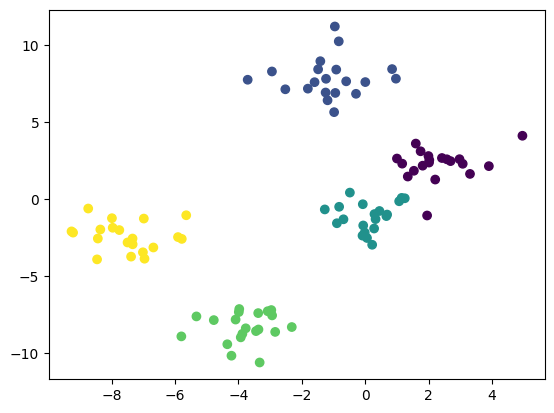

In [7]:
plt.scatter(x[:,0],x[:,1], c=y)

In [8]:
load_diabetes()


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [9]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns= data.feature_names)
df["target"] =data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
x = df[['bmi','bp']]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)
print("root_mean_squared_error:",root_mean_squared_error,(y_test, pred))
print("r^2:",r2_score,(y_test, pred))


root_mean_squared_error: <function root_mean_squared_error at 0x0000024A1689AF20> (287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64, array([140.31055482, 191.40487263, 143.47483795, 226.65377713,
       133.96595001, 120.86441446, 300.89641956, 198.64362971,
        53.47754705, 157.05285365, 114.98025125,  94.16882466,
        90.0996969 , 188.65826162, 104.10607708, 154.32762737,
       214.94152549, 253.80172909, 203.13042958, 228.46607934,
       171.54106016,  94.64530481,  95.9892063 , 190.47864326,
       181.48365877, 180.53069847, 223.95254854, 162.86751645,
        69.75940428, 130.35191766, 209.10274469, 110.00627885,
       134.47450727, 157.92027498, 162.96374779, 237.98031346,
       115.43534666, 116.78186108, 127.62669139,  80.62288608,
        88.27931526, 149.29745987, 144.34760547, 114.98025125,
       127.60803989, 111.81596812,  91.

In [11]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [12]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target
print(df.to_string())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
0         17.990         10.38          122.80     1001.0          0.11840           0.27760        0.300100             0.147100         0.2419                 0.07871        1.0950         0.9053           8.5890     153.400          0.006399           0.049040         0.053730              0.015870        0.030030                 0.006193        25.380          17.33           184.60      2019.0           0.16220            0.66560         0.711900              0.26

In [13]:
df.shape

(569, 31)

In [14]:
x = [['mean radius', 'mean perimeter ']]
y = ['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.9, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
predic = model.predict(x_test)
print("accuracy score :", accuracy_score(y_test, predic))
print("r^2 score:",r2_score(y_test, predic))


ValueError: With n_samples=1, test_size=0.9 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data =  load_iris()
t
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state =42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print("root_mean_squared_error:",root_mean_squared_error(y_test, prediction))
print("r2 score:", r2_score(y_test, prediction))




root_mean_squared_error: 0.19264940801356453
r2 score: 0.9468960016420045


In [ ]:
data = load_iris()
X = data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
preds= model.predict(x_test)

print("accuracy score:", accuracy_score(y_test, preds))
print("r2 score:",r2_score(y_test, preds))
z = [[1,2,3,4]]
prediction = model.predict(z)
data.target_names[prediction]


accuracy score: 1.0
r2 score: 1.0


array(['versicolor'], dtype='<U10')

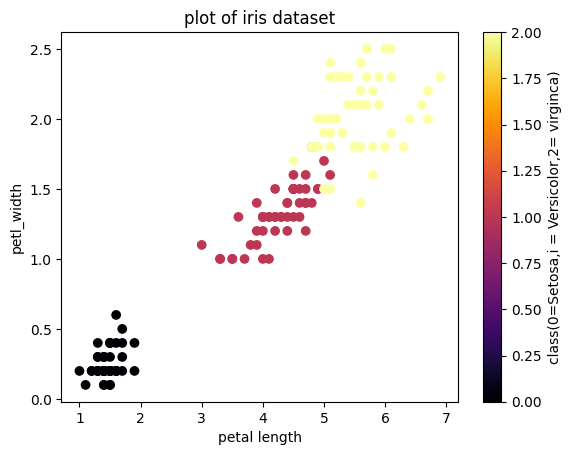

In [ ]:
x_feature = X[:,2]
y_feature =X[:,3] 
plt.scatter(x_feature,y_feature,c=y,cmap='inferno')
plt.xlabel("petal length")
plt.ylabel("petl_width")
plt.title("plot of iris dataset")
plt.colorbar(label="class(0=Setosa,i = Versicolor,2= virginca)")
plt.show()

cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


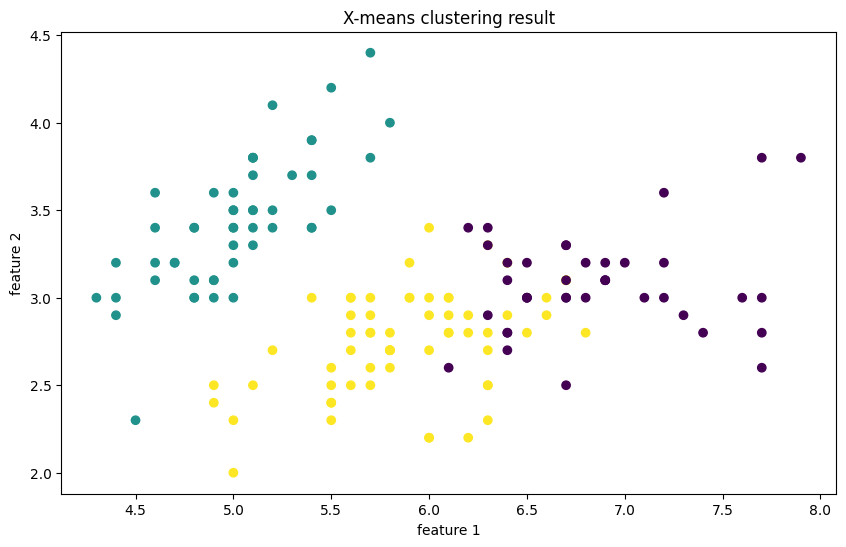

In [ ]:
data = load_iris()
X = data.data

kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

y_pred = kmeans.labels_
print('cluster labels:',y_pred)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("X-means clustering result")
plt.show()

('sample belongs to cluster :', array([1], dtype=int32))


TypeError: scatter() missing 1 required positional argument: 'y'

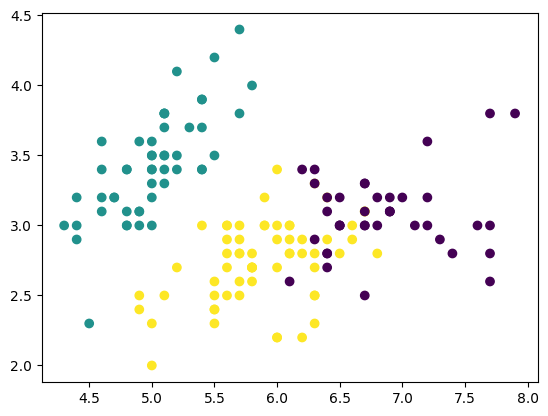

In [ ]:
sample = np.array([[5.2,3.8,1.6,0.2]])
sample_cluster = kmeans.predict(sample)
print(("sample belongs to cluster :", sample_cluster))
plt.scatter (X[:, 0], X[:,1], c=y_pred)
plt.scatter(sample)

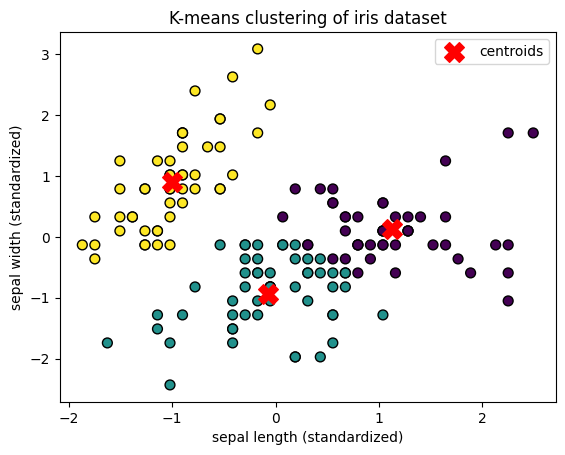

In [16]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:,:2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters,random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter (X_scaled[:,0],X_scaled[:,1], c=labels, cmap='viridis', edgecolors='k', s =50)
plt.scatter(centroids[:,0],centroids[:,1], c= 'red', marker = 'X', s= 200, label= 'centroids')
plt.title('K-means clustering of iris dataset')
plt.xlabel('sepal length (standardized)')
plt.ylabel('sepal width (standardized)')
plt.legend()
plt.show()

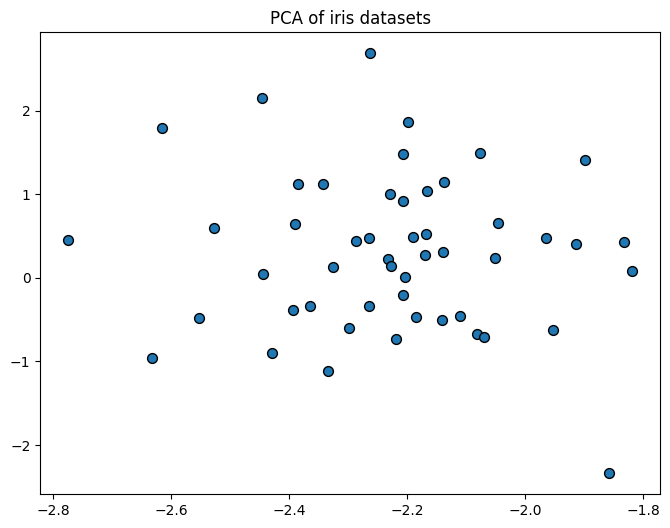

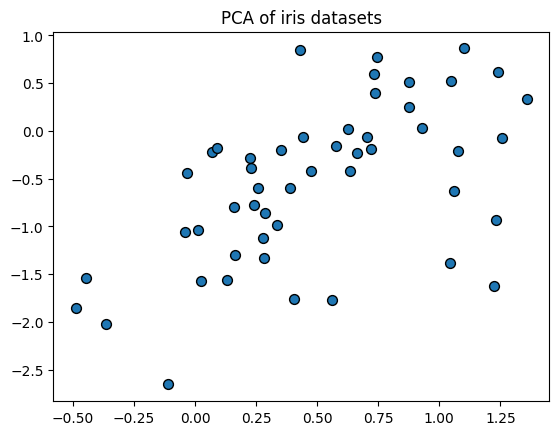

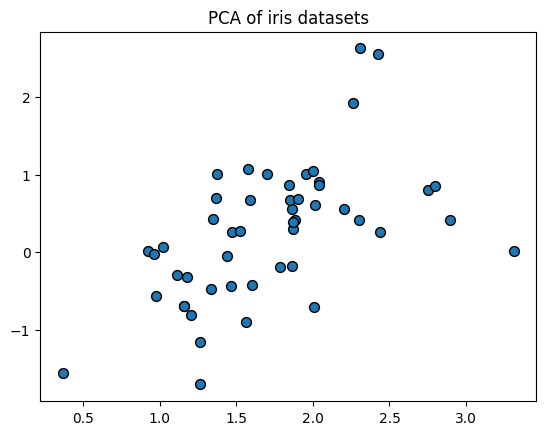

In [17]:
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for i in range(len(set(y))):
    plt.scatter(X_pca[y ==i,0],X_pca [y==i,1], label=f'class{i}',edgecolors='k',s=50 )
    plt.title('PCA of iris datasets')
    plt.show()

In [ ]:
df = pd.read_csv('customervalues.csv')
df.head(20)

,CustomerID,AnnualIncome,SpendingScore
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40
5,6,20,76
6,7,21,6
7,8,23,94
8,9,24,3
9,10,25,72


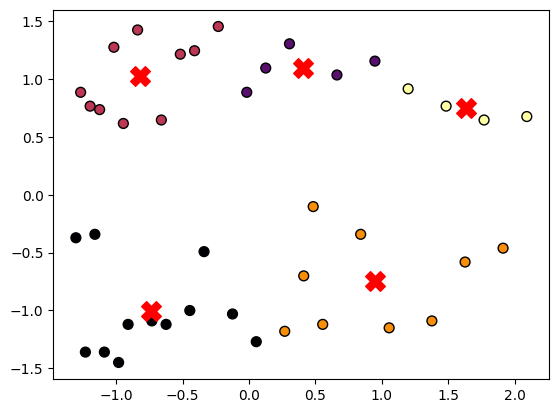

In [ ]:
X =  df[['AnnualIncome', 'SpendingScore']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter (X_scaled[:,0],X_scaled[:,1], c=labels, cmap='inferno', edgecolors='k', s =50)
plt.scatter(centroids[:,0],centroids[:,1], c= 'red', marker = 'X', s= 200, label= 'centroids')
plt.legend
plt.show()




In [ ]:
df = pd.read_csv('Land Price in Hanoi 2025 new.csv')
df.head(30)

,District,Ward,VT1,VT2,VT3,VT4
0,BA ĐÌNH,Cống Vị,"149,88","80,30","62,43","55,27"
1,BA ĐÌNH,Giảng Võ,"186,89","96,43","74,31","65,38"
2,BA ĐÌNH,Kim Mã,"196,90","101,09","77,80","68,39"
3,BA ĐÌNH,Liễu Giai,"198,63","102,18","78,68","69,19"
4,BA ĐÌNH,Nguyễn Trung Trực,"193,82","99,76","76,83","67,57"
5,BA ĐÌNH,Ngọc Hà,"189,95","97,79","75,32","66,24"
6,BA ĐÌNH,Ngọc Khánh,"209,24","106,74","82,03","72,03"
7,BA ĐÌNH,Phúc Xá,"132,53","71,87","56,03","49,70"
8,BA ĐÌNH,Quán Thánh,"213,99","108,60","83,35","73,13"
9,BA ĐÌNH,Thành Công,"181,19","94,00","72,53","63,87"


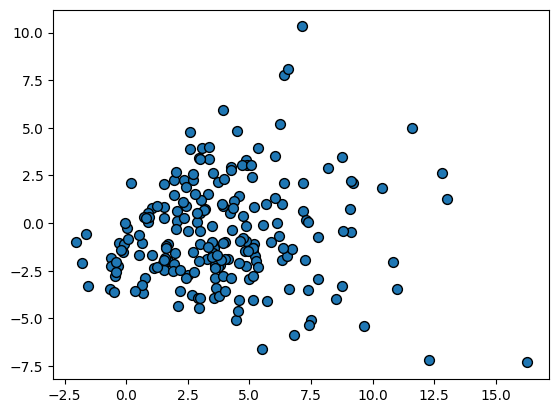

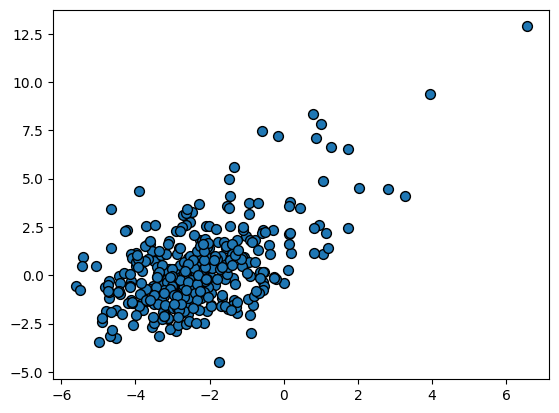

In [18]:
from sklearn.decomposition import PCA

X = df
y = df.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=45)
X_pca = pca.fit_transform(X_scaled)


for i in range(len(set(y))):
    plt.scatter(X_pca[y ==i,0],X_pca [y==i,1], label=f'class{i}',edgecolors='k',s=50 )
    plt.show()
